### Loading graphs in network



<IPython.core.display.Javascript object>


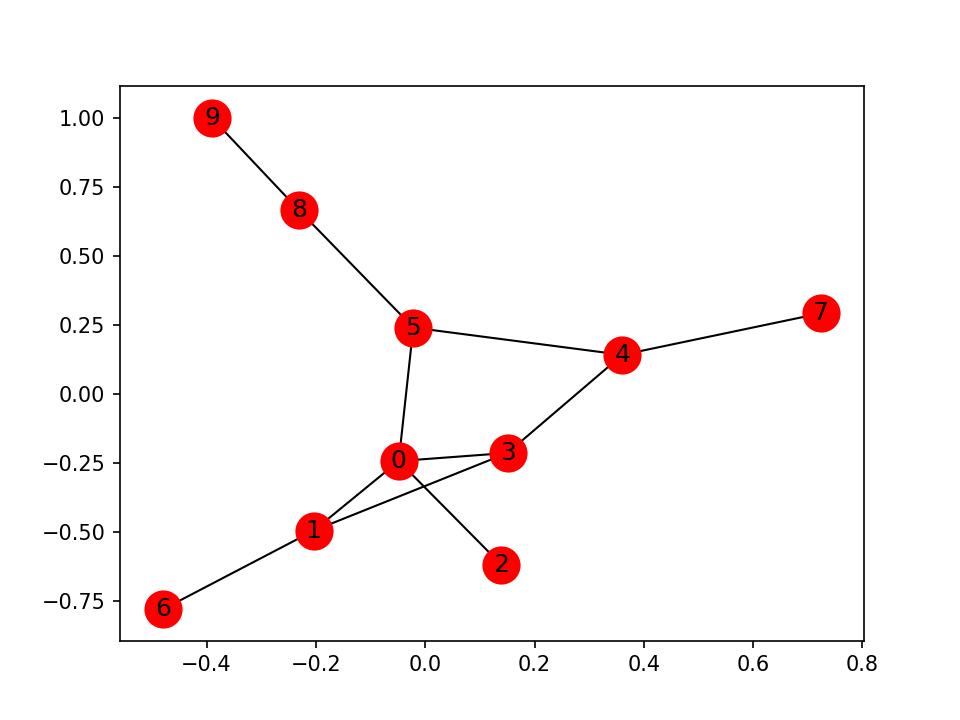

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()
G = nx.Graph()
G.add_edges_from([(0, 1),(0, 2), (0, 3), (0, 5), (1, 3), 
                  (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), 
                  (8, 9)])
nx.draw_networkx(G)


In [2]:
## equivalent of cat in windows is type
!type G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [3]:
## to read adjlist => First row contains nodes. 
## First value in the row is source node which has edge to all other values mentioned in the same row
## For e.g. 0 has edge to node 1, 2, 3 and 5
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

### Adjacency matrix

In [4]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

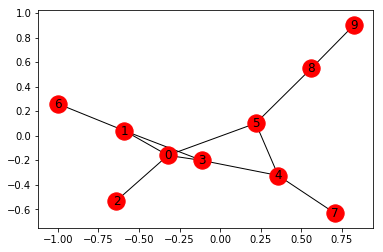

In [5]:
## to read the adjacency matrix nodes (First row: column 0 is assocciated to column 1, 2, 3, 5 as they have 1's in them
## same applies for other rows as well.
plt.figure()
G3 = nx.Graph(G_mat)
G3.edges
nx.draw_networkx(G3)

### Edgelist

##### As name suggest, each row of the list nodes and weight/attribute of the edge connecting the two nodes. 

In [6]:
!type G_edgelist.txt
## e.g. for first row Edge between Node 0 and Node 1 contains weight 4. 

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [7]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])
G4.edges(data = True)
## Do remember here we have Nodes as string  and weight as integer type. 

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

### Pandas DataFrame

In [8]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, header=None, names=['n1', 'n2', 'weight'])
G_df

n1  n2  weight
0    0   1       4
1    0   2       3
2    0   3       2
3    0   5       6
4    1   3       2
5    1   6       5
6    3   4       3
7    4   5       1
8    4   7       2
9    5   8       6
10   8   9       1

In [9]:
## Create graph from dataframe -- Remember starting version 1.11 from_pandas_dataframe method has been removed.
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr=True)
G5.edges(data=True)


EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### Chess Example

##### Each node corresponds to a chess player and a directed edge represents a game. With the white player in the first column having an outgoing edge, and the black player in the second column having an incoming edge. 

##### The weight of the edge in the third column represents the outcome. 1 for white win, 0 for draw, and -1 for black win. 

##### The data file also includes a column of approximate timestamps in the fourth column for when the games were played. 

In [10]:
#!gc "chess_graph.txt" -head 10

In [13]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], create_using = nx.MultiDiGraph())


In [17]:
chess.edges(data=True)

OutMultiEdgeDataView([('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}), ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}), ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '680', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '166', {'outcome': -1, 'timestamp': 906660000.0}), ('1', '1241', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '1242', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '808', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '819', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '448', {'outcome': 0, 'timestamp': 927684000.000003}), ('1', '1214', {'outcome': 0, 'tim

In [15]:
## check if its a directed graph and multigraph
chess.is_directed(), chess.is_multigraph()

(True, True)

In [26]:
## How many moves 
games_played = dict(chess.degree())


In [27]:
from pprint import pprint as pp
pp(games_played)

{'1': 48,
 '10': 4,
 '100': 20,
 '1000': 7,
 '1001': 2,
 '1002': 6,
 '1003': 11,
 '1004': 9,
 '1005': 44,
 '1006': 2,
 '1007': 121,
 '1008': 64,
 '1009': 17,
 '101': 49,
 '1010': 1,
 '1011': 2,
 '1012': 19,
 '1013': 67,
 '1014': 26,
 '1015': 11,
 '1016': 51,
 '1017': 4,
 '1018': 12,
 '1019': 3,
 '102': 31,
 '1020': 12,
 '1021': 37,
 '1022': 7,
 '1023': 12,
 '1024': 25,
 '1025': 186,
 '1026': 125,
 '1027': 158,
 '1028': 20,
 '1029': 65,
 '103': 8,
 '1030': 19,
 '1031': 27,
 '1032': 46,
 '1033': 43,
 '1034': 3,
 '1035': 92,
 '1036': 30,
 '1037': 6,
 '1038': 4,
 '1039': 44,
 '104': 95,
 '1040': 9,
 '1041': 10,
 '1042': 24,
 '1043': 3,
 '1044': 37,
 '1045': 15,
 '1046': 19,
 '1047': 18,
 '1048': 1,
 '1049': 19,
 '105': 6,
 '1050': 15,
 '1051': 22,
 '1052': 17,
 '1053': 11,
 '1054': 93,
 '1055': 67,
 '1056': 91,
 '1057': 112,
 '1058': 5,
 '1059': 5,
 '106': 18,
 '1060': 5,
 '1061': 31,
 '1062': 19,
 '1063': 26,
 '1064': 18,
 '1065': 42,
 '1066': 89,
 '1067': 18,
 '1068': 2,
 '1069': 5,
 '10

 '1784': 10,
 '1785': 23,
 '1786': 8,
 '1787': 34,
 '1788': 2,
 '1789': 24,
 '179': 48,
 '1790': 6,
 '1791': 177,
 '1792': 23,
 '1793': 11,
 '1794': 34,
 '1795': 3,
 '1796': 39,
 '1797': 9,
 '1798': 9,
 '1799': 19,
 '18': 45,
 '180': 25,
 '1800': 7,
 '1801': 6,
 '1802': 21,
 '1803': 6,
 '1804': 5,
 '1805': 10,
 '1806': 24,
 '1807': 21,
 '1808': 39,
 '1809': 24,
 '181': 8,
 '1810': 35,
 '1811': 17,
 '1812': 20,
 '1813': 17,
 '1814': 36,
 '1815': 20,
 '1816': 10,
 '1817': 6,
 '1818': 46,
 '1819': 102,
 '182': 39,
 '1820': 77,
 '1821': 7,
 '1822': 21,
 '1823': 45,
 '1824': 7,
 '1825': 6,
 '1826': 41,
 '1827': 37,
 '1828': 41,
 '1829': 59,
 '183': 43,
 '1830': 17,
 '1831': 15,
 '1832': 1,
 '1833': 2,
 '1834': 9,
 '1835': 37,
 '1836': 25,
 '1837': 13,
 '1838': 48,
 '1839': 28,
 '184': 37,
 '1840': 13,
 '1841': 18,
 '1842': 64,
 '1843': 37,
 '1844': 3,
 '1845': 2,
 '1846': 64,
 '1847': 16,
 '1848': 18,
 '1849': 8,
 '185': 82,
 '1850': 6,
 '1851': 30,
 '1852': 16,
 '1853': 49,
 '1854': 55,
 '

 '2908': 10,
 '2909': 13,
 '291': 24,
 '2910': 17,
 '2911': 25,
 '2912': 2,
 '2913': 16,
 '2914': 18,
 '2915': 14,
 '2916': 25,
 '2917': 8,
 '2918': 2,
 '2919': 26,
 '292': 1,
 '2920': 17,
 '2921': 5,
 '2922': 14,
 '2923': 13,
 '2924': 1,
 '2925': 7,
 '2926': 7,
 '2927': 39,
 '2928': 6,
 '2929': 17,
 '293': 2,
 '2930': 53,
 '2931': 2,
 '2932': 6,
 '2933': 19,
 '2934': 47,
 '2935': 25,
 '2936': 19,
 '2937': 2,
 '2938': 2,
 '2939': 6,
 '294': 13,
 '2940': 9,
 '2941': 6,
 '2942': 7,
 '2943': 20,
 '2944': 9,
 '2945': 7,
 '2946': 4,
 '2947': 3,
 '2948': 17,
 '2949': 3,
 '295': 46,
 '2950': 7,
 '2951': 2,
 '2952': 16,
 '2953': 6,
 '2954': 7,
 '2955': 12,
 '2956': 25,
 '2957': 35,
 '2958': 3,
 '2959': 19,
 '296': 21,
 '2960': 3,
 '2961': 3,
 '2962': 4,
 '2963': 3,
 '2964': 22,
 '2965': 14,
 '2966': 31,
 '2967': 2,
 '2968': 2,
 '2969': 31,
 '297': 7,
 '2970': 4,
 '2971': 10,
 '2972': 14,
 '2973': 30,
 '2974': 5,
 '2975': 11,
 '2976': 4,
 '2977': 32,
 '2978': 2,
 '2979': 10,
 '298': 28,
 '2980'

 '3583': 18,
 '3584': 24,
 '3585': 3,
 '3586': 15,
 '3587': 17,
 '3588': 9,
 '3589': 13,
 '359': 13,
 '3590': 8,
 '3591': 1,
 '3592': 47,
 '3593': 86,
 '3594': 26,
 '3595': 30,
 '3596': 8,
 '3597': 4,
 '3598': 29,
 '3599': 18,
 '36': 118,
 '360': 66,
 '3600': 31,
 '3601': 14,
 '3602': 25,
 '3603': 17,
 '3604': 38,
 '3605': 13,
 '3606': 17,
 '3607': 13,
 '3608': 45,
 '3609': 13,
 '361': 9,
 '3610': 1,
 '3611': 16,
 '3612': 4,
 '3613': 5,
 '3614': 4,
 '3615': 2,
 '3616': 8,
 '3617': 3,
 '3618': 16,
 '3619': 5,
 '362': 64,
 '3620': 2,
 '3621': 1,
 '3622': 3,
 '3623': 76,
 '3624': 2,
 '3625': 2,
 '3626': 2,
 '3627': 6,
 '3628': 22,
 '3629': 22,
 '363': 16,
 '3630': 19,
 '3631': 10,
 '3632': 3,
 '3633': 16,
 '3634': 15,
 '3635': 2,
 '3636': 6,
 '3637': 8,
 '3638': 20,
 '3639': 4,
 '364': 51,
 '3640': 4,
 '3641': 21,
 '3642': 21,
 '3643': 3,
 '3644': 21,
 '3645': 79,
 '3646': 12,
 '3647': 53,
 '3648': 6,
 '3649': 6,
 '365': 20,
 '3650': 22,
 '3651': 11,
 '3652': 16,
 '3653': 6,
 '3654': 22,


 '4258': 6,
 '4259': 2,
 '426': 17,
 '4260': 3,
 '4261': 10,
 '4262': 6,
 '4263': 9,
 '4264': 2,
 '4265': 9,
 '4266': 8,
 '4267': 2,
 '4268': 4,
 '4269': 24,
 '427': 4,
 '4270': 19,
 '4271': 15,
 '4272': 30,
 '4273': 12,
 '4274': 16,
 '4275': 2,
 '4276': 17,
 '4277': 32,
 '4278': 3,
 '4279': 3,
 '428': 4,
 '4280': 4,
 '4281': 8,
 '4282': 26,
 '4283': 17,
 '4284': 28,
 '4285': 12,
 '4286': 14,
 '4287': 35,
 '4288': 4,
 '4289': 6,
 '429': 9,
 '4290': 5,
 '4291': 13,
 '4292': 2,
 '4293': 13,
 '4294': 1,
 '4295': 36,
 '4296': 28,
 '4297': 4,
 '4298': 20,
 '4299': 1,
 '43': 10,
 '430': 10,
 '4300': 5,
 '4301': 1,
 '4302': 33,
 '4303': 25,
 '4304': 17,
 '4305': 7,
 '4306': 5,
 '4307': 24,
 '4308': 16,
 '4309': 31,
 '431': 8,
 '4310': 2,
 '4311': 8,
 '4312': 3,
 '4313': 26,
 '4314': 2,
 '4315': 5,
 '4316': 4,
 '4317': 4,
 '4318': 14,
 '4319': 21,
 '432': 46,
 '4320': 3,
 '4321': 19,
 '4322': 4,
 '4323': 18,
 '4324': 15,
 '4325': 1,
 '4326': 4,
 '4327': 30,
 '4328': 20,
 '4329': 1,
 '433': 23,

 '4933': 1,
 '4934': 13,
 '4935': 2,
 '4936': 7,
 '4937': 4,
 '4938': 1,
 '4939': 2,
 '494': 23,
 '4940': 3,
 '4941': 14,
 '4942': 15,
 '4943': 1,
 '4944': 4,
 '4945': 5,
 '4946': 1,
 '4947': 8,
 '4948': 4,
 '4949': 5,
 '495': 38,
 '4950': 3,
 '4951': 5,
 '4952': 1,
 '4953': 1,
 '4954': 32,
 '4955': 6,
 '4956': 5,
 '4957': 4,
 '4958': 1,
 '4959': 5,
 '496': 136,
 '4960': 10,
 '4961': 3,
 '4962': 14,
 '4963': 16,
 '4964': 6,
 '4965': 2,
 '4966': 12,
 '4967': 4,
 '4968': 5,
 '4969': 5,
 '497': 112,
 '4970': 2,
 '4971': 6,
 '4972': 1,
 '4973': 1,
 '4974': 2,
 '4975': 8,
 '4976': 6,
 '4977': 2,
 '4978': 1,
 '4979': 6,
 '498': 17,
 '4980': 6,
 '4981': 6,
 '4982': 2,
 '4983': 6,
 '4984': 2,
 '4985': 1,
 '4986': 1,
 '4987': 5,
 '4988': 3,
 '4989': 11,
 '499': 61,
 '4990': 1,
 '4991': 1,
 '4992': 1,
 '4993': 1,
 '4994': 2,
 '4995': 8,
 '4996': 16,
 '4997': 4,
 '4998': 3,
 '4999': 1,
 '5': 18,
 '50': 9,
 '500': 148,
 '5000': 2,
 '5001': 6,
 '5002': 2,
 '5003': 4,
 '5004': 2,
 '5005': 1,
 '5006'

 '5607': 2,
 '5608': 5,
 '5609': 1,
 '561': 41,
 '5610': 1,
 '5611': 9,
 '5612': 1,
 '5613': 3,
 '5614': 2,
 '5615': 3,
 '5616': 4,
 '5617': 1,
 '5618': 1,
 '5619': 1,
 '562': 36,
 '5620': 1,
 '5621': 2,
 '5622': 1,
 '5623': 1,
 '5624': 1,
 '5625': 2,
 '5626': 1,
 '5627': 3,
 '5628': 15,
 '5629': 3,
 '563': 178,
 '5630': 2,
 '5631': 3,
 '5632': 2,
 '5633': 3,
 '5634': 6,
 '5635': 1,
 '5636': 2,
 '5637': 9,
 '5638': 1,
 '5639': 2,
 '564': 8,
 '5640': 6,
 '5641': 1,
 '5642': 5,
 '5643': 1,
 '5644': 2,
 '5645': 1,
 '5646': 1,
 '5647': 1,
 '5648': 3,
 '5649': 1,
 '565': 10,
 '5650': 27,
 '5651': 5,
 '5652': 2,
 '5653': 2,
 '5654': 7,
 '5655': 12,
 '5656': 1,
 '5657': 15,
 '5658': 1,
 '5659': 2,
 '566': 78,
 '5660': 9,
 '5661': 1,
 '5662': 5,
 '5663': 4,
 '5664': 2,
 '5665': 4,
 '5666': 2,
 '5667': 8,
 '5668': 5,
 '5669': 7,
 '567': 17,
 '5670': 4,
 '5671': 6,
 '5672': 2,
 '5673': 5,
 '5674': 3,
 '5675': 3,
 '5676': 5,
 '5677': 5,
 '5678': 2,
 '5679': 5,
 '568': 29,
 '5680': 6,
 '5681': 4,


 '6282': 1,
 '6283': 1,
 '6284': 6,
 '6285': 2,
 '6286': 3,
 '6287': 1,
 '6288': 1,
 '6289': 5,
 '629': 8,
 '6290': 11,
 '6291': 12,
 '6292': 1,
 '6293': 3,
 '6294': 9,
 '6295': 6,
 '6296': 5,
 '6297': 2,
 '6298': 2,
 '6299': 3,
 '63': 7,
 '630': 3,
 '6300': 5,
 '6301': 2,
 '6302': 12,
 '6303': 3,
 '6304': 9,
 '6305': 3,
 '6306': 2,
 '6307': 7,
 '6308': 5,
 '6309': 6,
 '631': 9,
 '6310': 3,
 '6311': 3,
 '6312': 4,
 '6313': 1,
 '6314': 2,
 '6315': 3,
 '6316': 10,
 '6317': 9,
 '6318': 7,
 '6319': 1,
 '632': 15,
 '6320': 6,
 '6321': 3,
 '6322': 2,
 '6323': 6,
 '6324': 1,
 '6325': 2,
 '6326': 2,
 '6327': 4,
 '6328': 1,
 '6329': 2,
 '633': 46,
 '6330': 6,
 '6331': 1,
 '6332': 4,
 '6333': 3,
 '6334': 3,
 '6335': 1,
 '6336': 2,
 '6337': 4,
 '6338': 4,
 '6339': 8,
 '634': 33,
 '6340': 10,
 '6341': 1,
 '6342': 3,
 '6343': 2,
 '6344': 2,
 '6345': 4,
 '6346': 5,
 '6347': 3,
 '6348': 7,
 '6349': 6,
 '635': 155,
 '6350': 4,
 '6351': 1,
 '6352': 2,
 '6353': 5,
 '6354': 13,
 '6355': 7,
 '6356': 5,
 '

 '836': 6,
 '837': 14,
 '838': 63,
 '839': 12,
 '84': 32,
 '840': 43,
 '841': 17,
 '842': 61,
 '843': 8,
 '844': 31,
 '845': 3,
 '846': 6,
 '847': 21,
 '848': 78,
 '849': 129,
 '85': 35,
 '850': 2,
 '851': 33,
 '852': 42,
 '853': 22,
 '854': 7,
 '855': 18,
 '856': 6,
 '857': 10,
 '858': 4,
 '859': 37,
 '86': 13,
 '860': 33,
 '861': 28,
 '862': 139,
 '863': 39,
 '864': 35,
 '865': 13,
 '866': 5,
 '867': 14,
 '868': 36,
 '869': 6,
 '87': 52,
 '870': 21,
 '871': 28,
 '872': 70,
 '873': 20,
 '874': 42,
 '875': 9,
 '876': 28,
 '877': 8,
 '878': 11,
 '879': 46,
 '88': 61,
 '880': 117,
 '881': 6,
 '882': 78,
 '883': 78,
 '884': 9,
 '885': 102,
 '886': 39,
 '887': 6,
 '888': 12,
 '889': 11,
 '89': 123,
 '890': 9,
 '891': 56,
 '892': 17,
 '893': 37,
 '894': 2,
 '895': 36,
 '896': 14,
 '897': 66,
 '898': 36,
 '899': 12,
 '9': 142,
 '90': 58,
 '900': 43,
 '901': 29,
 '902': 45,
 '903': 2,
 '904': 20,
 '905': 5,
 '906': 11,
 '907': 19,
 '908': 25,
 '909': 5,
 '91': 100,
 '910': 92,
 '911': 3,
 '91

In [40]:
## Find which player played most games
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]
## ", " in the above provides value for the key, if "," is ignored then we would get the value as list

In [42]:
print("Max Key : {} & Max value : {}".format(max_key, max_value))

Max Key : 461 & Max value : 280


In [85]:
edgeInfo = []
for edge in chess.edges(data=True):
    edgeInfo.append((edge[0], edge[1], edge[2]['outcome']))

df = pd.DataFrame(np.array(edgeInfo), columns=['white', 'black', 'outcome'], dtype=np.int16)


In [86]:
df.head()

white  black  outcome
0      1      2        0
1      1      3        0
2      1      4        0
3      1      5        1
4      1      6        0

In [100]:
won_as_white = df[df['outcome'] == 1].groupby('white').sum()
won_as_black = df[df['outcome'] == 1].groupby('black').sum()
won_as_black.reset_index(inplace=True)
won_as_black.set_index(['black', 'white'], inplace=True)
won_as_white.reset_index(inplace=True)
won_as_white.set_index(['black', 'white'], inplace=True)

In [113]:
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

outcome
black white           
1.0   5078.0       4.0
2.0   12030.0     16.0
3.0   4067.0       5.0
4.0   98.0         1.0
5.0   6311.0       7.0

In [114]:
win_count.nlargest(5, 'outcome')

outcome
black   white         
90483.0 461.0     67.0
58252.0 330.0     62.0
66184.0 98.0      62.0
76663.0 467.0     59.0
41083.0 371.0     52.0

In [99]:
won_as_black.head()

outcome
black white           
1     5078.0       4.0
2     12030.0     16.0
3     4067.0       5.0
4     98.0         1.0
5     6311.0       7.0

In [106]:
sorted(won_as_black)

['outcome']

In [109]:
won_as_black.loc[[1, 5078], :]

outcome
black white          
1     5078.0      4.0

In [112]:
won_as_white.loc[[1, 5078], :]

Empty DataFrame
Columns: [outcome]
Index: []

In [122]:
import networkx as nx

G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.node['A']['role'] = 'team member'
G.node['B']['role'] = 'engineer'

G['A']['B'][0]['relation']

'friend'

In [125]:
import networkx as nx

G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.node['A']['role'] = 'team member'
G.node['B']['role'] = 'engineer'

G.node['A']

{'role': 'team member'}

<IPython.core.display.Javascript object>


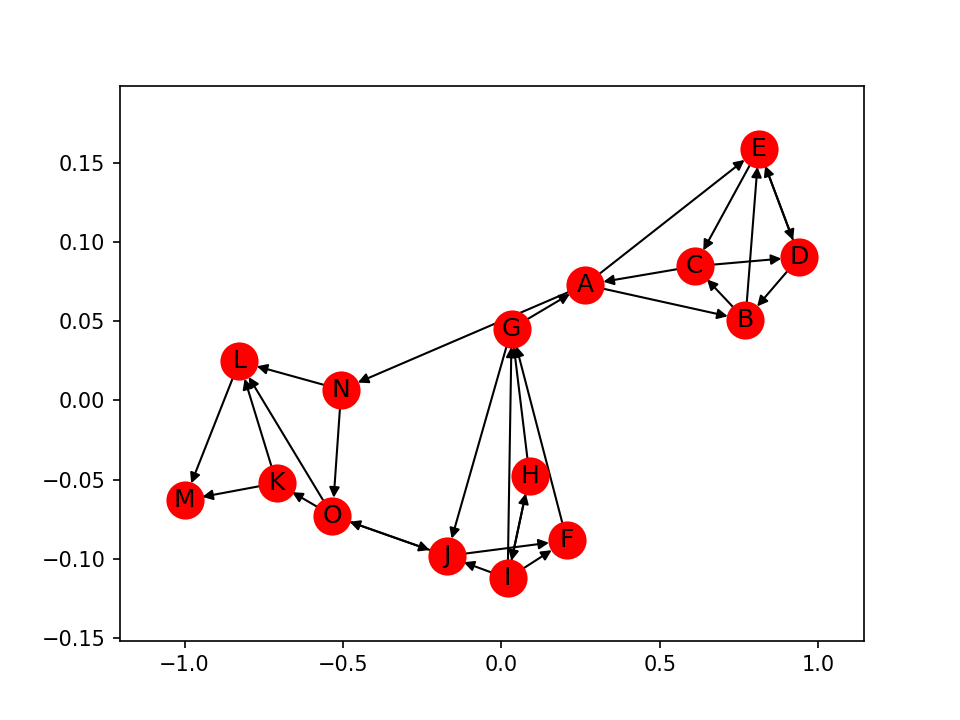

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), ('G', 'A'), ('A', 'N'), ('B', 'C'), ('D', 'B'), ('B', 'E'), ('C', 'D'), ('E', 'C'), ('D', 'E'), ('E', 'D'), ('F', 'G'), ('I', 'F'), ('J', 'F'), ('H', 'G'), ('I', 'G'), ('G', 'J'), ('I', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'O'), ('O', 'J'), ('K', 'M'), ('K', 'L'), ('O', 'K'), ('O', 'L'), ('N', 'L'), ('L', 'M'), ('N', 'O')])

nx.draw_networkx(G)